In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

sns.set_style('darkgrid')

In [2]:
df_origin = pd.read_csv('./dataset.csv')

In [3]:
df_origin.head()

,text,raw_data_id
0,<|user|> What is high blood pressure? <|eos|> ...,0
1,<|user|> What are the risks of high blood pres...,0
2,<|user|> How is high blood pressure diagnosed?...,0
3,<|user|> What are the lifestyle changes that c...,0
4,<|user|> What are the medicines used to contro...,0


In [4]:
df = df_origin.drop(columns=['raw_data_id'], axis=1)

In [5]:
df.head()

,text
0,<|user|> What is high blood pressure? <|eos|> ...
1,<|user|> What are the risks of high blood pres...
2,<|user|> How is high blood pressure diagnosed?...
3,<|user|> What are the lifestyle changes that c...
4,<|user|> What are the medicines used to contro...


In [6]:
for i in range(5):
    print(f'{df.loc[i, "text"]}\n\n' + '*' * 50 + '\n')

<|user|> What is high blood pressure? <|eos|> <|ai|> High blood pressure is a condition where the force at which your heart pumps blood around your body is high. It is recorded with 2 numbers, the systolic pressure and the diastolic pressure, both measured in millimetres of mercury (mmHg).
References:
- https://www.nhs.uk/conditions/Blood-pressure-(high)/Pages/Introduction.aspx <|eos|> <|eod|>

**************************************************

<|user|> What are the risks of high blood pressure? <|eos|> <|ai|> Persistent high blood pressure can put extra strain on your blood vessels, heart, and other organs, such as the brain, kidneys, and eyes. It can increase your risk of serious and potentially life-threatening health conditions, such as heart disease, heart attacks, strokes, heart failure, peripheral arterial disease, aortic aneurysms, kidney disease, and vascular dementia.
References:
- https://www.nhs.uk/conditions/Blood-pressure-(high)/Pages/Introduction.aspx <|eos|> <|eod|>

*

In [7]:
df['text'] = df['text'].str.split('References:').str[0].str.strip() + ' <|eos|> <|eod|>'

In [8]:
for i in range(5):
    print(f'{df.loc[i, "text"]}\n\n' + '*' * 50 + '\n')

<|user|> What is high blood pressure? <|eos|> <|ai|> High blood pressure is a condition where the force at which your heart pumps blood around your body is high. It is recorded with 2 numbers, the systolic pressure and the diastolic pressure, both measured in millimetres of mercury (mmHg). <|eos|> <|eod|>

**************************************************

<|user|> What are the risks of high blood pressure? <|eos|> <|ai|> Persistent high blood pressure can put extra strain on your blood vessels, heart, and other organs, such as the brain, kidneys, and eyes. It can increase your risk of serious and potentially life-threatening health conditions, such as heart disease, heart attacks, strokes, heart failure, peripheral arterial disease, aortic aneurysms, kidney disease, and vascular dementia. <|eos|> <|eod|>

**************************************************

<|user|> How is high blood pressure diagnosed? <|eos|> <|ai|> The only way of knowing whether you have high blood pressure is to 

In [9]:
import re

def convert_to_gemma_format(text):
    t = text.replace('<|eos|>', '').replace('<|eod|>', '')
    t = t.replace('<|user|>', '<start_of_turn>user\n')
    t = t.replace('<|ai|>', '<end_of_turn>\n<start_of_turn>model\n')
    t = t.strip()
    t = re.sub(r'\n\s+', '\n', t)
    t = re.sub(r'\s+<end_of_turn>', '<end_of_turn>', t)
    t = re.sub(r'[ \t]+(\n)', r'\1', t)
    t = re.sub(r' {2,}', ' ', t)
    if not t.endswith('<end_of_turn>'):
        t = t + '<end_of_turn>'

    return t
    
df['text'] = df['text'].apply(convert_to_gemma_format)

In [10]:
for i in range(5):
    print(f'{df.loc[i, "text"]}\n\n' + '*' * 50 + '\n')

<start_of_turn>user
What is high blood pressure?<end_of_turn>
<start_of_turn>model
High blood pressure is a condition where the force at which your heart pumps blood around your body is high. It is recorded with 2 numbers, the systolic pressure and the diastolic pressure, both measured in millimetres of mercury (mmHg).<end_of_turn>

**************************************************

<start_of_turn>user
What are the risks of high blood pressure?<end_of_turn>
<start_of_turn>model
Persistent high blood pressure can put extra strain on your blood vessels, heart, and other organs, such as the brain, kidneys, and eyes. It can increase your risk of serious and potentially life-threatening health conditions, such as heart disease, heart attacks, strokes, heart failure, peripheral arterial disease, aortic aneurysms, kidney disease, and vascular dementia.<end_of_turn>

**************************************************

<start_of_turn>user
How is high blood pressure diagnosed?<end_of_turn>
<sta

In [11]:
df['len'] = df['text'].str.split().apply(len)

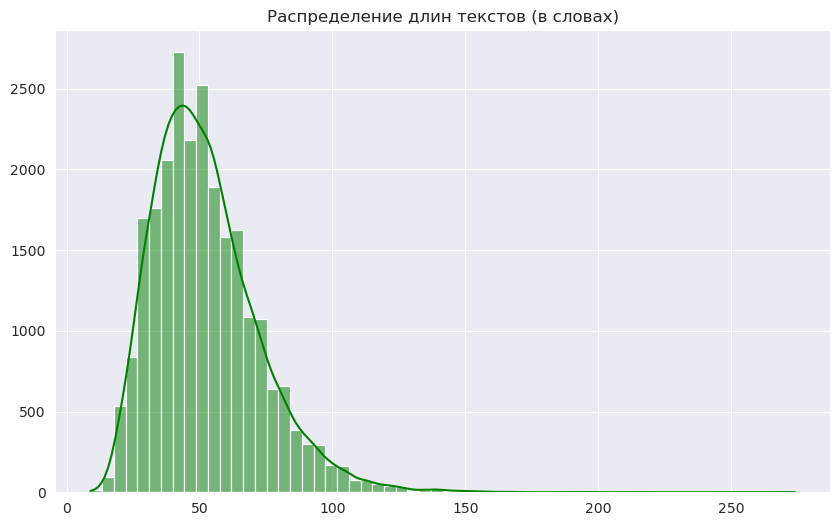

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='len', kde=True, bins=60, color='green')
plt.title('Распределение длин текстов (в словах)')
plt.yticks(None)
plt.xlabel(None)
plt.ylabel(None);

In [13]:
df.shape

(24665, 2)

In [14]:
df[df['len'] > 160]

,text,len
1410,<start_of_turn>user\nWhat should I do if I mis...,195
6633,<start_of_turn>user\nWhat are the symptoms of ...,166
7044,<start_of_turn>user\nWhat are the main steps f...,166
9885,<start_of_turn>user\nHow does the cervical sec...,170
12862,"<start_of_turn>user\nWhat are ticks, and how c...",164
14215,<start_of_turn>user\nHow do I treat someone wh...,164
14344,<start_of_turn>user\nWhat financial support is...,162
14768,<start_of_turn>user\nWhat are the stages of me...,217
17722,<start_of_turn>user\nHow can I keep children u...,274
22835,<start_of_turn>user\nHow can I prepare for tra...,186


In [15]:
df = df[df['len'] < 160]

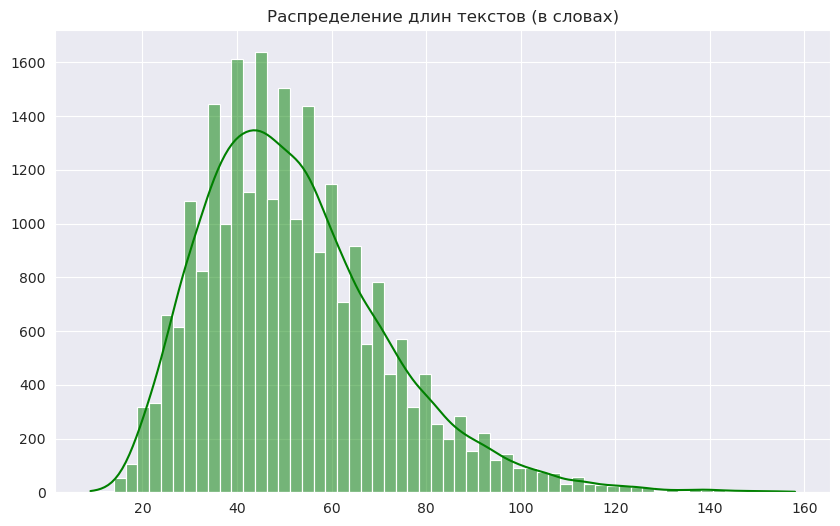

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='len', kde=True, bins=60, color='green')
plt.title('Распределение длин текстов (в словах)')
plt.yticks(None)
plt.xlabel(None)
plt.ylabel(None);

In [17]:
df

,text,len
0,<start_of_turn>user\nWhat is high blood pressu...,47
1,<start_of_turn>user\nWhat are the risks of hig...,64
2,<start_of_turn>user\nHow is high blood pressur...,64
3,<start_of_turn>user\nWhat are the lifestyle ch...,56
4,<start_of_turn>user\nWhat are the medicines us...,55
...,...,...
24660,<start_of_turn>user\nWhat is the prevalence of...,32
24661,<start_of_turn>user\nWhat is the prevalence of...,21
24662,<start_of_turn>user\nWhat is the burden associ...,69
24663,<start_of_turn>user\nWhat does the clinical gu...,43


In [18]:
df['text'] = df['text'].str.replace("<\\|eos\\|>", "<eos>", regex=True)

In [19]:
from datasets import Dataset

dataset = Dataset.from_pandas(df[["text"]])

In [20]:
dataset

Dataset({
    features: ['text', '__index_level_0__'],
    num_rows: 24654
})

In [21]:
dataset = dataset.remove_columns(["__index_level_0__"])

In [22]:
from datasets import DatasetDict

split_temp = dataset.train_test_split(test_size=0.1, seed=42)

temp = split_temp["test"]
val_test_split = temp.train_test_split(test_size=0.5, seed=42)

dataset = DatasetDict({
    "train": split_temp["train"],
    "validation": val_test_split["train"],
    "test": val_test_split["test"]
})

In [23]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 22188
    })
    validation: Dataset({
        features: ['text'],
        num_rows: 1233
    })
    test: Dataset({
        features: ['text'],
        num_rows: 1233
    })
})

In [24]:
from transformers import AutoTokenizer

checkpoint = "./gemma-2-2b-it"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [25]:
print("padding_side:", tokenizer.padding_side)

padding_side: left


In [26]:
tokenizer.padding_side = "right"

In [27]:
print(tokenizer.vocab_size)

256000


In [28]:
print(tokenizer.special_tokens_map)
print(tokenizer.all_special_tokens)

{'bos_token': '<bos>', 'eos_token': '<eos>', 'unk_token': '<unk>', 'pad_token': '<pad>', 'additional_special_tokens': ['<start_of_turn>', '<end_of_turn>']}
['<bos>', '<eos>', '<unk>', '<pad>', '<start_of_turn>', '<end_of_turn>']


In [29]:
def tokenize_for_len_analysis(example, max_length=1024):
    tokens = tokenizer(
        example["text"],
        padding=False
    )["input_ids"]

    return {"input_ids": tokens}

In [30]:
tokenized_dataset_temp = dataset.map(tokenize_for_len_analysis, batched=False)

Map:   0%|          | 0/22188 [00:00<?, ? examples/s]

Map:   0%|          | 0/1233 [00:00<?, ? examples/s]

Map:   0%|          | 0/1233 [00:00<?, ? examples/s]

In [31]:
lengths = [len(x["input_ids"]) for x in tokenized_dataset_temp["train"]]
lengths_df = pd.DataFrame(data=lengths)

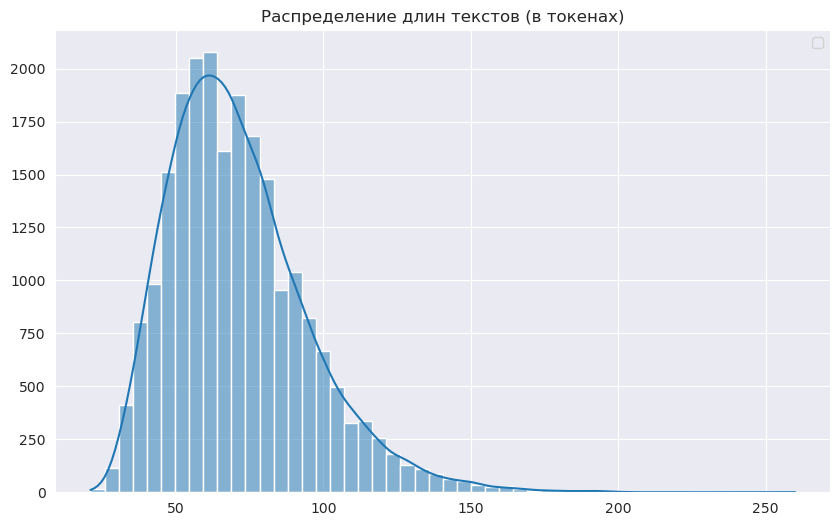

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data=lengths_df, kde=True, bins=50)
plt.yticks(None)
plt.xlabel(None)
plt.ylabel(None)
plt.legend([])
plt.title("Распределение длин текстов (в токенах)");

In [33]:
print("90-й перцентиль:", np.percentile(lengths, 90))
print("95-й перцентиль:", np.percentile(lengths, 95))
print("99-й перцентиль:", np.percentile(lengths, 99))
print("Максимальная длина:", max(lengths))

90-й перцентиль: 102.0
95-й перцентиль: 115.0
99-й перцентиль: 144.0
Максимальная длина: 260


In [34]:
def tokenize_and_mask(example, max_length=152):
    tokens = tokenizer(
        example["text"],
        truncation=True,
        max_length=max_length,
        padding="max_length",
    )["input_ids"]

    start_id = tokenizer.convert_tokens_to_ids("<start_of_turn>")

    indices = [i for i, t in enumerate(tokens) if t == start_id]

    ai_index = None
    for idx in indices:
        following_text = tokenizer.decode(tokens[idx: idx+3])
        if "model" in following_text:
            ai_index = idx
            break

    if ai_index is None:
        return {"input_ids": tokens, "labels": [-100] * len(tokens)}

    labels = [-100] * (ai_index + 1) + tokens[ai_index + 1:]

    return {"input_ids": tokens, "labels": labels}

In [35]:
tokenized_dataset = dataset.map(tokenize_and_mask, batched=False)

Map:   0%|          | 0/22188 [00:00<?, ? examples/s]

Map:   0%|          | 0/1233 [00:00<?, ? examples/s]

Map:   0%|          | 0/1233 [00:00<?, ? examples/s]

In [36]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

bnb = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type='nf4',
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [37]:
from transformers import AutoModelForCausalLM
model = AutoModelForCausalLM.from_pretrained(
    checkpoint,
    quantization_config=bnb,
    trust_remote_code=True,
    device_map="auto",
    attn_implementation="eager"
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [38]:
from peft import prepare_model_for_kbit_training
model = prepare_model_for_kbit_training(model)

In [39]:
from peft import LoraConfig, get_peft_model

lora = LoraConfig(
    r=8,
    lora_alpha=16,
    lora_dropout=0.05,
    target_modules=['q_proj', 'k_proj', 'v_proj', 'o_proj']
)

model = get_peft_model(model, lora)

In [40]:
model.config.use_cache = False
model.gradient_checkpointing_enable()

In [41]:
from transformers import Trainer, TrainingArguments, DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(tokenizer, mlm=False)

training_args = TrainingArguments(
    output_dir="./gemma-lora",
    per_device_train_batch_size=4,
    gradient_accumulation_steps=4,
    learning_rate=2e-4,
    num_train_epochs=3,
    save_strategy="steps",
    save_steps=200,
    logging_steps=50,
    eval_strategy="steps",
    eval_steps=200,
    fp16=True,

)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    data_collator=data_collator
)

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss
